<b><span style="color:#b7190f;">FYI: The actual file is a merge of 8 notebooks, so you will find redundancy in importing the libraries and other parts like "Load data": to see the individual notebook, please see the folder "notebooks"</span></b>

# Table of contents

# Data PreProcessing

### Import libraries

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltt
from matplotlib.pyplot import figure
import seaborn as sns
from utils import *

### Load the dataset

You can download the dataset form Kaggle with the below link <br>
https://www.kaggle.com/datasets/wkirgsn/electric-motor-temperature/data

**Dataset Features**
*  u_q   :  Voltage q-component measurement in dq-coordinates (in V)
*  coolant   :  Coolant temperature (in °C)
*  stator_winding   :  Stator winding temperature (in °C) measured with thermocouples
*  u_d   :  Voltage d-component measurement in dq-coordinates
*  stator_tooth   :  Stator tooth temperature (in °C) measured with thermocouples
*  motor_speed   :  Motor speed (in rpm)
*  i_d   :  Current d-component measurement in dq-coordinates
*  i_q   :  Current q-component measurement in dq-coordinates
*  pm   :  Permanent magnet temperature (in °C) measured with thermocouples and transmitted wirelessly via a thermography unit. ==> The output
*  stator_yoke   :  Stator yoke temperature (in °C) measured with 
<br> <br>
All recordings are sampled at 2 Hz. The data set consists of multiple measurement sessions, which can be distinguished from each other by column "profile_id". A measurement session can be between one and six hours long.

In [2]:
df=pd.read_csv(r'../data/raw/measures_v2.csv.zip')

In [3]:
df.head(2)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.08667,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.09239,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17


In [4]:
df.info( memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


Number of sessions

In [5]:
len(df.profile_id.unique())

69

### Derived inputs

In [16]:
df2=df.copy()

In [17]:
#voltage magnitude
df2['us']=np.sqrt(df2.u_d**2+df2.u_q**2)

In [23]:
# current magnitude
df2['is']=np.sqrt(df2.i_d**2+df2.i_q**2)

In [24]:
# Electric apparent power
df2['Se']=1.5*df2.us*df2['is']

In [25]:
# Mecanical power 
df2['Pm']=df2.torque*(2*np.pi*df2.motor_speed/60)

### Plots

**Mechanical power (Pm) vs apparent electrical power (Se)**

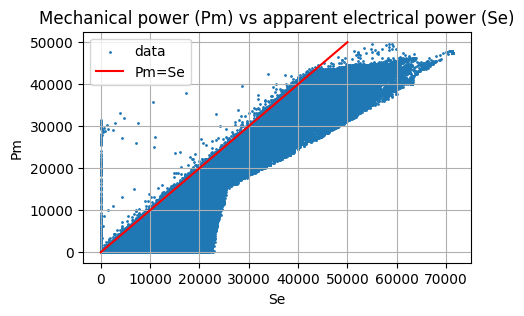

In [36]:
# Plot only Pm> 0 beacause Se >  by definition
df2[df2.Pm>0].plot(x='Se',y='Pm',kind='scatter',s=1,figsize=(5,3),label='data')
plt.plot([0,50000],[0,50000],c='r',label='Pm=Se')
plt.title('Mechanical power (Pm) vs apparent electrical power (Se)')
plt.legend()
plt.grid()
plt.show()

**Torque (N.m) Vs Motor speed (tr/min)**

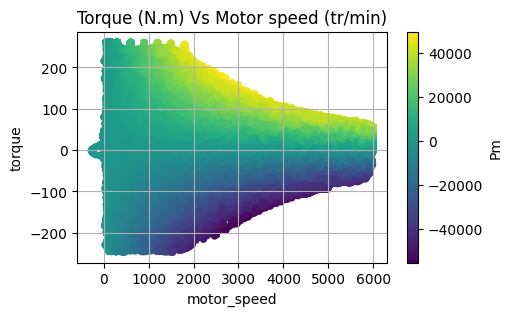

In [38]:
df2.plot.scatter(x= 'motor_speed',y='torque',c='Pm',figsize=(5,3))
plt.title('Torque (N.m) Vs Motor speed (tr/min)')
plt.grid()
plt.show()

**Mechanical Power (Pm W) Vs Motor speed (tr/min)**

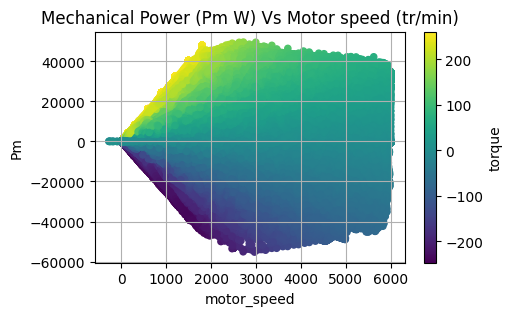

In [39]:
df2.plot.scatter(x= 'motor_speed',y='Pm',c='torque',figsize=(5,3))
plt.title('Mechanical Power (Pm W) Vs Motor speed (tr/min)')
plt.grid()
plt.show()

**The correlation matrix**

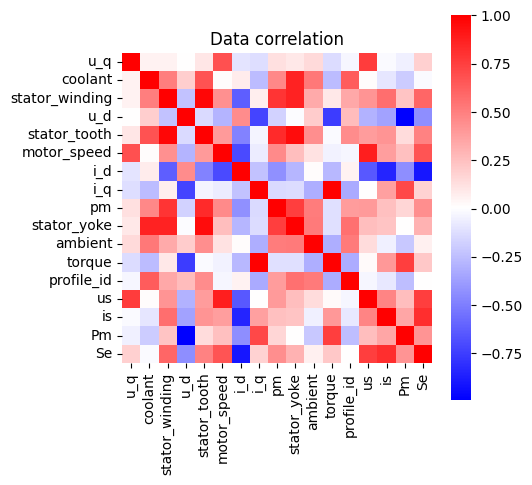

In [65]:
corr=df2.corr()

plt.figure(figsize=(5,5))
sns.heatmap(data=corr,square=True,cmap='bwr')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title('Data correlation')
plt.show()

In [83]:
'Correlation between the output ('+out+') and the inputs'

'Correlation between the output (pm) and the inputs'

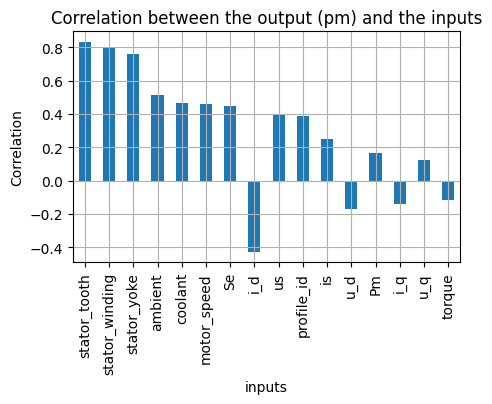

In [86]:
out='pm'
s=corr[out].drop(out)
index_sort=s.abs().sort_values(ascending=False).index
s[index_sort].plot.bar(figsize=(5,3))
plt.title('Correlation between the output ('+out+') and the inputs')
plt.xlabel('inputs')
plt.ylabel('Correlation')
plt.grid()
plt.show()

**Historgam of the output**

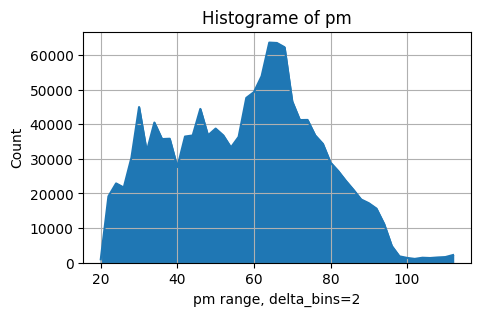

In [98]:
out='pm'
hist=df2[out]
wind=2
# The wind is equivalent to the bins_delta
hist=(hist//wind)*wind
# we can approach the histogram by a sample value count
# otherwise we can use  np.histogram or other fonction: see the second plot
hist=hist.value_counts().sort_index()
hist.plot.area(figsize=(5,3))
plt.title('Histograme of '+out )
plt.xlabel(out + ' range, delta_bins='+str(wind))
plt.ylabel('Count')
plt.grid()
plt.show()

**Density PDF and CDF of the output**

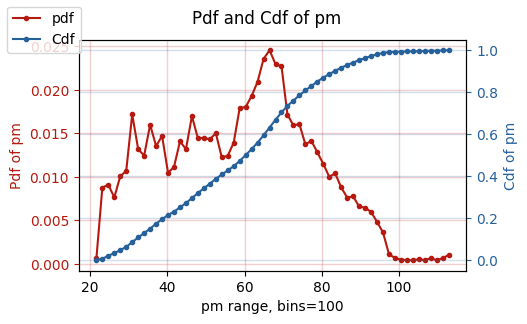

In [161]:
out='pm'

# Color plot 
r='#b7190f'
b='#26619c'

# PDF and CDF calculation
pdf, bins = np.histogram(df2[out], bins=60, density=True)
bins = 0.5 * (bins[:-1] + bins[1:])
cdf=integrate.cumtrapz(pdf, bins, initial=0)

# Create a new figure with two y-axes
fig, ax1 = plt.subplots(figsize=(5,3))
ax2 = ax1.twinx()

# ax1 PDF
ax1.plot(bins, pdf, label='pdf', marker='.',c=r)
ax1.set_xlabel(out + ' range, bins=100')
ax1.set_ylabel('Pdf of '+out,c=r)
ax1.grid(which='major',  color=r, linewidth=1,alpha=0.2)
ax1.tick_params(axis='y', colors=r)

# ax2 CDF
ax2.plot(bins, cdf, label='Cdf', marker='.',c=b)
ax2.set_ylabel('Cdf of '+out,c=b)
ax2.grid(which='major',  color=b, linewidth=1,alpha=0.2)
ax2.tick_params(axis='y', colors=b)


plt.suptitle('Pdf and Cdf of ' + out)
fig.legend(loc='upper left')
plt.show()

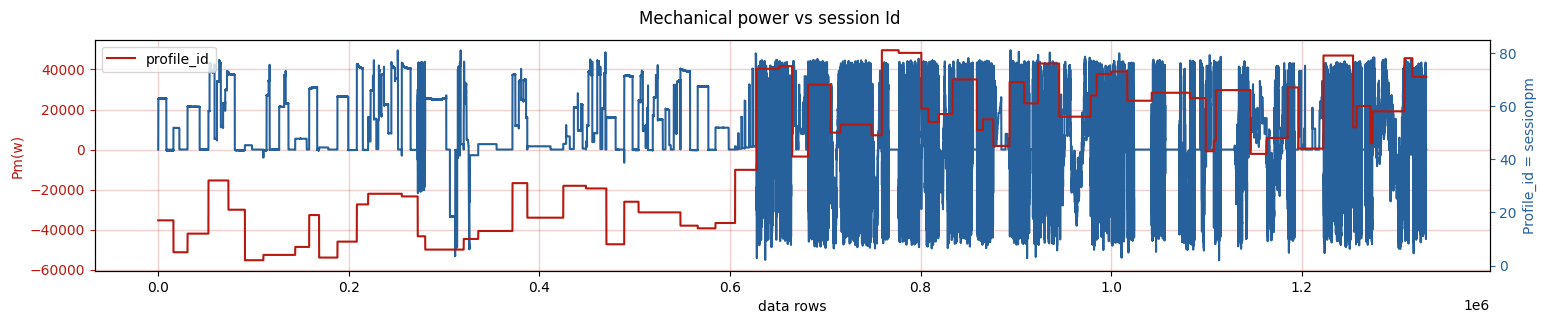

In [169]:
# Color plot 
r='#b7190f'
b='#26619c'

# Create a new figure with two y-axes
fig, ax1 = plt.subplots(figsize=(18, 3))
ax2 = ax1.twinx()

# ax1 Pm
ax1.plot(df2.Pm,label='Pm',c=b)
ax1.set_xlabel('data rows')
ax1.set_ylabel('Pm(w)',c=r)
ax1.grid(which='major',  color=r, linewidth=1,alpha=0.2)
ax1.tick_params(axis='y', colors=r)

# ax2 sessions
ax2.plot(df2.profile_id,label='profile_id',c=r)
ax2.set_ylabel('Profile_id = session'+out,c=b)
ax2.grid(which='major',  color=b, linewidth=1,alpha=0.2)
ax2.tick_params(axis='y', colors=b)

plt.suptitle('Mechanical power vs session Id')
plt.legend()
plt.grid()

### Split the train/test set

In general cases, we use the function sklearn.model_selection.train_test_split to split train/test set, but in our case we cant use it because the below points:
* We must respect the time chronology of data
* We must avoid splitting session between train and test if we use train_test_split() with shuffle = True, we can find data of row "t" in train set and the data of row "t+1" in the test set, so the model will fit the train data of "t", and since the data of "t+1" is very close to the data of "t", so the model will predict very will the test set: but if we come with new data like an overfitting. For more information, you can search in google with the keyword "data leakage time series"
* We will make a hand slitting data function that will be adapted to our problem

**The session id**

In [168]:
np.sort(df2.profile_id.iloc[int(6e5):].unique())

array([16, 36, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 78, 79, 80, 81], dtype=int64)

**The spliting funciton**

for more details about this funciton: split_with_groupes
<br> please check the utils package 

In [188]:
df_train,df_test=split_with_groupes(df=df2,groups_col='profile_id',test_size=0.2,seed=0,n_ether=10)

In [189]:
len(df_test)/len(df2),len(df_train)/len(df2)

(0.200810630470328, 0.799189369529672)

In [191]:
df_train2=df_train.reset_index(drop=True)
df_test2=df_test.reset_index(drop=True)

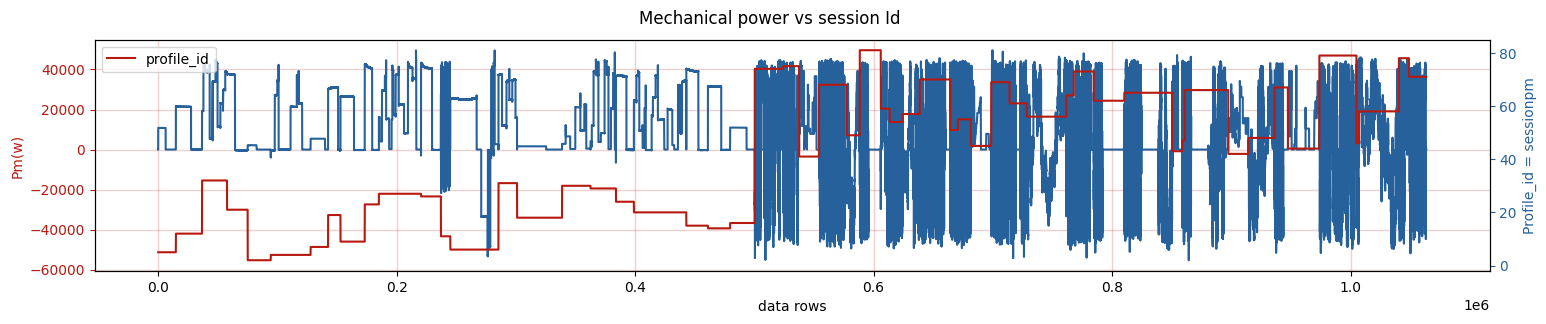

In [192]:
# Color plot 
r='#b7190f'
b='#26619c'

# Create a new figure with two y-axes
fig, ax1 = plt.subplots(figsize=(18, 3))
ax2 = ax1.twinx()

# ax1 Pm
ax1.plot(df_train2.Pm,label='Pm',c=b)
ax1.set_xlabel('data rows')
ax1.set_ylabel('Pm(w)',c=r)
ax1.grid(which='major',  color=r, linewidth=1,alpha=0.2)
ax1.tick_params(axis='y', colors=r)

# ax2 sessions
ax2.plot(df_train2.profile_id,label='profile_id',c=r)
ax2.set_ylabel('Profile_id = session'+out,c=b)
ax2.grid(which='major',  color=b, linewidth=1,alpha=0.2)
ax2.tick_params(axis='y', colors=b)

plt.suptitle('Mechanical power vs session Id')
plt.legend()
plt.grid()

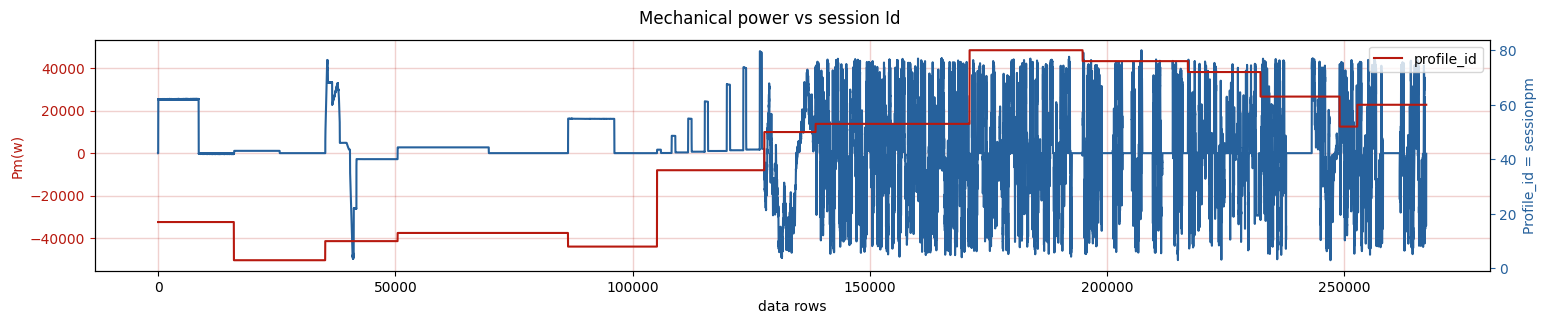

In [193]:
# Color plot 
r='#b7190f'
b='#26619c'

# Create a new figure with two y-axes
fig, ax1 = plt.subplots(figsize=(18, 3))
ax2 = ax1.twinx()

# ax1 Pm
ax1.plot(df_test2.Pm,label='Pm',c=b)
ax1.set_xlabel('data rows')
ax1.set_ylabel('Pm(w)',c=r)
ax1.grid(which='major',  color=r, linewidth=1,alpha=0.2)
ax1.tick_params(axis='y', colors=r)

# ax2 sessions
ax2.plot(df_test2.profile_id,label='profile_id',c=r)
ax2.set_ylabel('Profile_id = session'+out,c=b)
ax2.grid(which='major',  color=b, linewidth=1,alpha=0.2)
ax2.tick_params(axis='y', colors=b)

plt.suptitle('Mechanical power vs session Id')
plt.legend()
plt.grid()

### Prepare X and y 

In [195]:
df2.columns

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque',
       'profile_id', 'us', 'is', 'Pm', 'Se'],
      dtype='object')

In [196]:
colsx=['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'stator_yoke', 'ambient', 'torque',
       'profile_id','us', 'is', 'Se', 'Pm']
X_train=df_train[colsx]
y_train=df_train[ 'pm' ]

In [197]:
X_test=df_test[colsx]
y_test=df_test[ 'pm' ]

In [198]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1063574, 16), (267242, 16), (1063574,), (267242,))

**Save the data**

In [203]:
np.savez(r'../data/processed/No_normalized_data_V3.npz', 
         X_train=X_train.values, 
         y_train=  y_train.values, 
         X_test=X_test.values, 
         y_test=  y_test.values,
        colsx=colsx,
        colsy=['pm'])